In [1]:
import pandas as pd

from matplotlib.pylab import plt

In [61]:
base_dir = '/home/mma6789/Stuff/Studies/sem3/ms_project' #@param {type: 'string'}

dataset = 'US-101' #@param ['I-80', 'US-101']
t_o = 5000 #@param [3000, 4000, 5000] -> observation horizon
t_p = 3500 #@param [1500, 2000, 2500, 3000, 3500] -> prediction horizon

method = 'LSTMHMM' #@param ['LSTM', 'HMM', 'LSTMHMM']
learning_rate = 0.0002

In [62]:
## Load metrics
metrics = pd.read_json(f'{base_dir}/metrics/{method}/{dataset}/training_{t_o}_{t_p}_{learning_rate}.json')

epochs = len(metrics.index)

metrics

,train_loss,train_acc,train_f1,train_class_acc,valid_loss,valid_acc,valid_f1,valid_class_acc
0,0.896295,0.637625,0.748359,"[0.5879213184000001, 0.6416243879, 0.471076593...",0.893334,0.681135,0.780974,"[0.4711834143, 0.6898592044, 0.5018620323]"
1,0.860465,0.641546,0.750744,"[0.639255715, 0.6442507699000001, 0.472568674]",0.846171,0.618123,0.732629,"[0.7405019343, 0.6179187252, 0.4123071467]"
2,0.835348,0.641698,0.750521,"[0.6653482190000001, 0.6433637533000001, 0.492...",0.854355,0.835821,0.880348,"[0.49221307410000004, 0.852205109, 0.4085830821]"
3,0.817656,0.636992,0.746756,"[0.6782562467000001, 0.63769139, 0.51801974140...",0.808300,0.549961,0.677111,"[0.7887114374, 0.5442597981, 0.48554708280000003]"
4,0.799019,0.640819,0.749450,"[0.6842317916, 0.6411450164, 0.5418165124000001]",0.787448,0.632487,0.742802,"[0.7592500744, 0.6312143792, 0.4867884377]"
...,...,...,...,...,...,...,...,...
135,0.046664,0.975807,0.978358,"[0.9899627858000001, 0.9751479955000001, 0.992...",0.072495,0.969526,0.973239,"[0.9839301657, 0.9689256632000001, 0.9819116865]"
136,0.046645,0.976169,0.978644,"[0.9900903775000001, 0.9755257546, 0.9923100467]",0.078532,0.967788,0.971882,"[0.9833349866000001, 0.9671430524, 0.981025004..."
137,0.050572,0.974596,0.977376,"[0.9894098884, 0.9739208762, 0.991124034]",0.064219,0.975269,0.977849,"[0.9867076679000001, 0.9748230640000001, 0.983..."
138,0.046562,0.976350,0.978789,"[0.9899415205000001, 0.9757164273000001, 0.992...",0.076835,0.972166,0.975443,"[0.9775815891, 0.9718687842, 0.9813796772000001]"


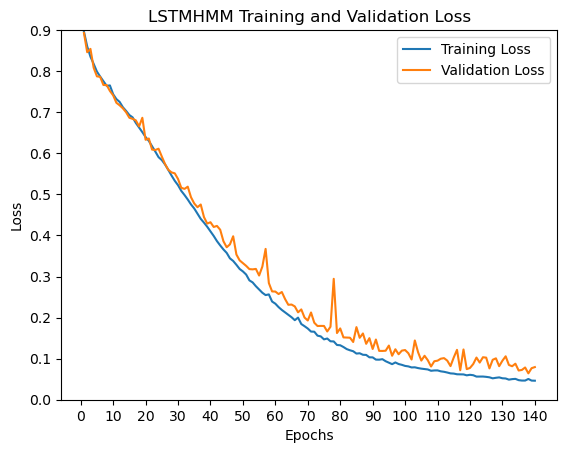

In [54]:
## Loss graph
plt.plot(range(1, epochs + 1), metrics['train_loss'].tolist(), label='Training Loss')
plt.plot(range(1, epochs + 1), metrics['valid_loss'].tolist(), label='Validation Loss')
 
plt.title(f'{method} Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.xticks(range(0, epochs + 1, 10))
plt.legend(loc='best')
plt.ylim(bottom=0, top=0.9)
plt.show()

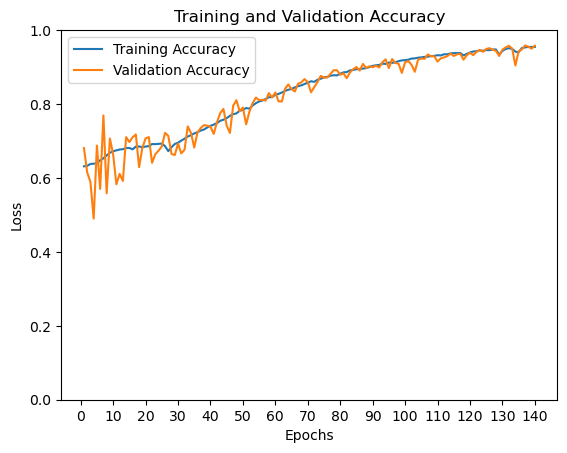

In [5]:
## Accuracy graph
plt.plot(range(1, epochs + 1), metrics['train_acc'].tolist(), label='Training Accuracy')
plt.plot(range(1, epochs + 1), metrics['valid_acc'].tolist(), label='Validation Accuracy')
 
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.xticks(range(0, epochs + 1, 10))
plt.legend(loc='best')
plt.ylim(bottom=0, top=1)
plt.show()

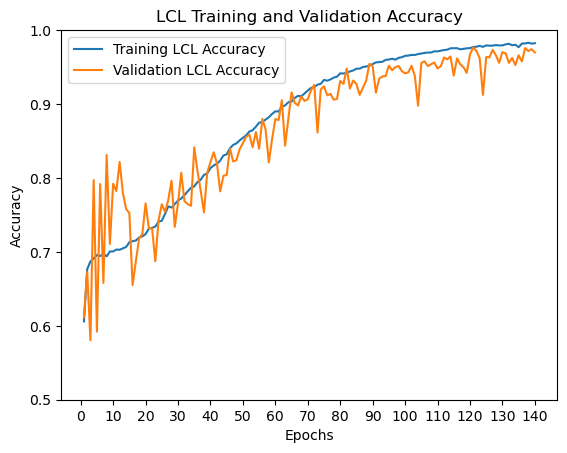

In [9]:
## Classwise accuracy graphs
plt.plot(range(1, epochs + 1), [e[0] for e in metrics['train_class_acc'].tolist()], label='Training LCL Accuracy')
plt.plot(range(1, epochs + 1), [e[0] for e in metrics['valid_class_acc'].tolist()], label='Validation LCL Accuracy')
 
plt.title('LCL Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.xticks(range(0, epochs + 1, 10))
plt.legend(loc='best')
plt.ylim(bottom=0.5, top=1)
plt.show()

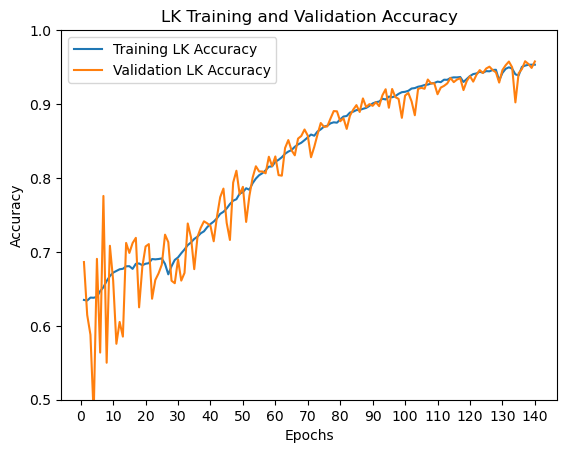

In [10]:
plt.plot(range(1, epochs + 1), [e[1] for e in metrics['train_class_acc'].tolist()], label='Training LK Accuracy')
plt.plot(range(1, epochs + 1), [e[1] for e in metrics['valid_class_acc'].tolist()], label='Validation LK Accuracy')
 
plt.title('LK Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.xticks(range(0, epochs + 1, 10))
plt.legend(loc='best')
plt.ylim(bottom=0.5, top=1)
plt.show()

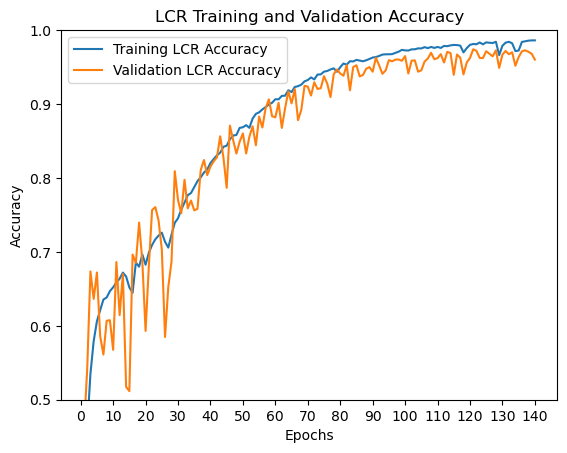

In [11]:
plt.plot(range(1, epochs + 1), [e[2] for e in metrics['train_class_acc'].tolist()], label='Training LCR Accuracy')
plt.plot(range(1, epochs + 1), [e[2] for e in metrics['valid_class_acc'].tolist()], label='Validation LCR Accuracy')
 
plt.title('LCR Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.xticks(range(0, epochs + 1, 10))
plt.legend(loc='best')
plt.ylim(bottom=0.5, top=1)
plt.show()